In [24]:
from visual_behavior.data_access import loading
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis
import visual_behavior_glm.GLM_fit_tools as gft
import allensdk
import numpy as np
import pandas as pd
import scipy
allensdk.__version__

'2.4.0'

In [7]:
oeid = 1000744370
dataset = loading.get_ophys_dataset(oeid, include_invalid_rois=False)
session = ResponseAnalysis(
    dataset, 
    overwrite_analysis_files=False, 
    use_extended_stimulus_presentations=True, 
#     dataframe_format = dataframe_format
) 

loading data for 1000744370_485152_200115_VISp_0_Slc17a7-IRES2-Cre_MESO.1_behavior_248


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
ERROR:visual_behavior.ophys.sync.process_sync:Sync photodiode error needs to be fixed. Using assumed monitor delay: 0.0351


resampling mesoscope 2P frame times


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:367: UserWarning: Time array is 1 value shorter than encoder array. Last encoder value removed

  "value removed\n", UserWarning, stacklevel=1)
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:15: RuntimeWarning: Mean of empty slice
  dxdt = np.nanmean(dxdt, axis=0)
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


In [9]:
session.dataset.eye_tracking

,timestamps,cr_area,eye_area,pupil_area,likely_blink,cr_center_x,cr_center_y,cr_width,cr_height,cr_phi,eye_center_x,eye_center_y,eye_width,eye_height,eye_phi,pupil_center_x,pupil_center_y,pupil_width,pupil_height,pupil_phi
frame,,,,,,,,,,,,,,,,,,,,
0,0.13830,240.365978,27463.220120,11827.806781,True,284.221946,284.920105,7.471285,10.240657,0.673415,309.895694,251.769873,129.327211,67.594549,-0.165124,315.121736,259.950467,61.358845,47.859667,0.338343
1,0.15902,258.671929,11357.847493,3195.100950,True,273.620558,294.799261,10.071354,8.175449,0.489881,291.650137,303.149615,86.276970,41.903594,-0.222383,322.162260,277.075115,31.890943,17.368489,-0.035813
2,0.17698,188.435892,10022.433359,4954.671074,True,279.284497,290.891288,7.074107,8.478952,-0.510695,301.904188,295.402420,99.509649,32.059601,-0.286013,328.322127,277.152480,39.712980,16.179217,-0.194933
3,0.19883,253.869152,10344.312888,7172.842383,True,280.481071,284.544712,7.811214,10.345263,-0.527793,314.435495,276.465307,97.611770,33.732582,-0.161626,324.468236,270.981566,47.782702,21.822039,-0.069057
4,0.23297,280.551083,10883.717482,4163.797019,True,283.866300,285.251635,10.631459,8.399805,0.478942,316.373080,275.083667,101.002308,34.300156,-0.111461,339.036358,268.595628,36.405738,24.413568,-0.019784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136455,4548.66047,205.616667,51671.739131,10154.159563,False,298.480625,262.220121,8.398335,7.793190,-0.679588,311.779845,245.866035,153.191691,107.366302,-0.057231,331.176467,229.493523,56.852171,48.970391,0.385726
136456,4548.69344,202.582693,51887.229620,10316.538068,False,298.154834,262.901275,8.399555,7.677082,-0.682971,311.487761,246.995745,152.600000,108.232098,-0.064380,330.224902,230.359125,57.304939,49.483928,0.311680
136457,4548.71380,208.112506,51788.859802,10478.020996,False,298.149131,263.143269,8.403745,7.882708,-0.612836,311.961051,247.329657,152.504439,108.094599,-0.062782,330.808698,230.184504,57.751690,49.520654,0.374968


In [12]:
eye = session.dataset.eye_tracking.copy(deep=True)

# Compute pupil radius
eye['pupil_radius'] = np.sqrt(eye['pupil_area']*(1/np.pi))

# Remove likely blinks and interpolate
eye.loc[eye['likely_blink'],:] = np.nan
eye = eye.interpolate()   

In [17]:
run_params = {'eye_transient_threshold':0.5}

In [20]:
# Do a second transient removal step
x = scipy.stats.zscore(eye['pupil_radius'],nan_policy='omit')
d_mask = np.abs(np.diff(x,append=x[-1])) > run_params['eye_transient_threshold']

/home/dougo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


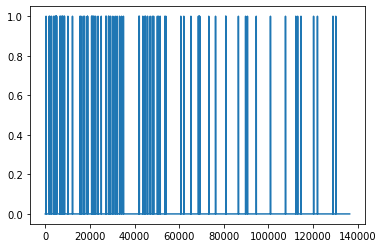

In [23]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(d_mask)

In [ ]:
gft.process_eye_data(session,run_params,ophys_timestamps =fit['fit_trace_timestamps'] )